# Traditional Credit Model


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from ASAS import FICOScoreModel
import Aid_traditional as aid

In [2]:
data = aid.clean_data_trad('data_traditional.csv')
data

,customer_id,avg_credit_history,avg_delay,avg_num_inquires,avg_outstanding_debt,avg_credit_mix,avg_credit_score
0,CUS_0x1000,46,62,11,1563,0,0
1,CUS_0x1009,128,7,3,203,1,1
2,CUS_0x100b,67,14,2,1030,2,0
3,CUS_0x1011,66,27,7,473,1,1
4,CUS_0x1013,75,12,3,1234,2,1
...,...,...,...,...,...,...,...
12082,CUS_0xff3,72,12,4,1229,2,1
12083,CUS_0xff4,78,16,5,758,1,1
12084,CUS_0xff6,104,0,2,338,2,1
12085,CUS_0xffc,56,45,12,1300,0,0


In [3]:
fico_model = FICOScoreModel()
df_results = fico_model.run(data)
df_results


,Customer ID,Avg Credit History,Avg Delay,Avg Num Inquires,Avg Outstanding Debt,Avg Credit Mix,Original Credit Score,Payment History Score,Amounts Owed Score,Length of History Score,Credit Mix Score,Inquiries Score,Calculated FICO Score
0,CUS_0x1000,46,62,11,1563,0,0,100.0,20,65,20,50,617
1,CUS_0x1009,128,7,3,203,1,1,90.0,20,100,60,75,663
2,CUS_0x100b,67,14,2,1030,2,0,90.0,20,80,100,90,676
3,CUS_0x1011,66,27,7,473,1,1,70.0,20,80,60,50,594
4,CUS_0x1013,75,12,3,1234,2,1,90.0,20,80,100,75,668
...,...,...,...,...,...,...,...,...,...,...,...,...,...
12082,CUS_0xff3,72,12,4,1229,2,1,90.0,20,80,100,75,668
12083,CUS_0xff4,78,16,5,758,1,1,70.0,20,80,60,75,608
12084,CUS_0xff6,104,0,2,338,2,1,100.0,20,95,100,90,708
12085,CUS_0xffc,56,45,12,1300,0,0,50.0,20,65,20,50,521


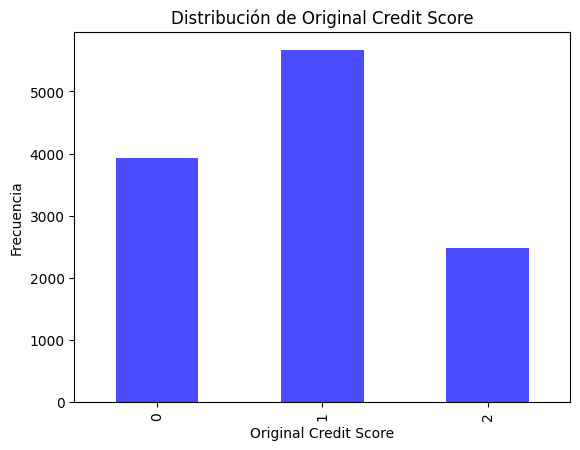

In [4]:
# Contar los valores y reindexarlos en el orden deseado
value_counts = df_results['Original Credit Score'].value_counts()
ordered_counts = value_counts.reindex([0, 1, 2])

# Graficar
ordered_counts.plot(kind='bar', color='blue', alpha=0.7)
plt.title('Distribución de Original Credit Score')
plt.xlabel('Original Credit Score')
plt.ylabel('Frecuencia')
plt.show()

<Axes: >

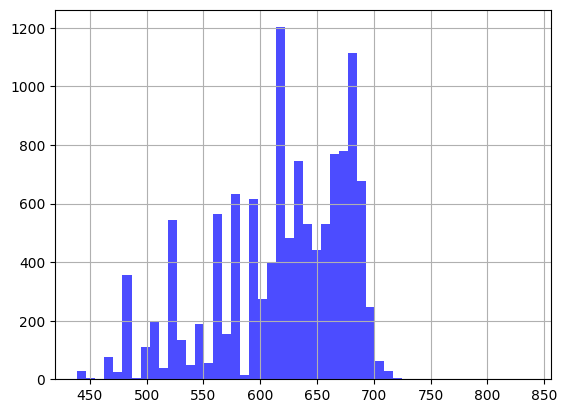

In [5]:
df_results['Calculated FICO Score'].hist(bins=50, color='blue', alpha=0.7)

In [18]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt
from sklearn.preprocessing import label_binarize
import numpy as np

C:\Users\renat\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


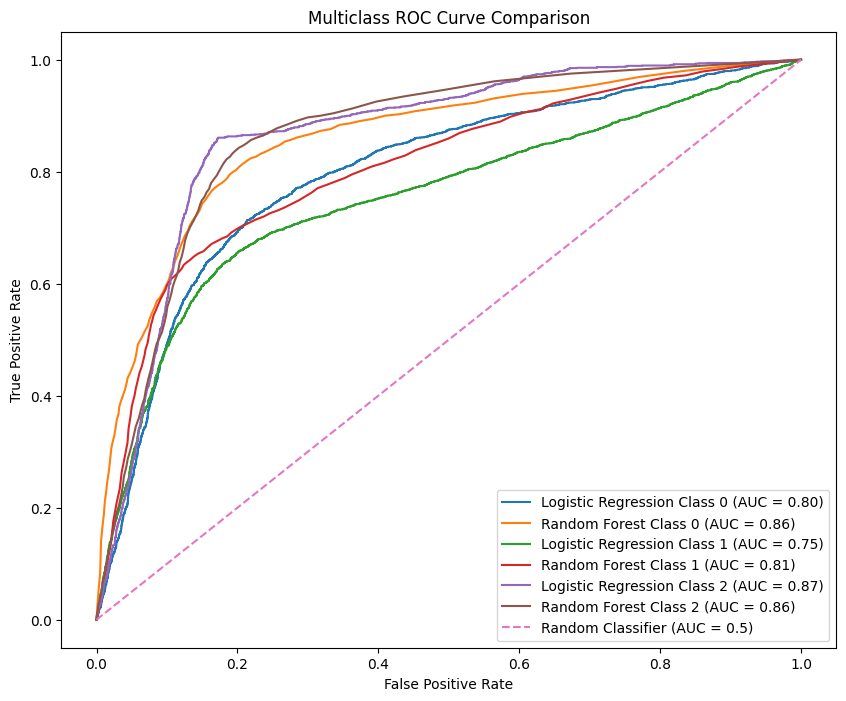

In [19]:
# Use all features except the target columns
X = df_results.drop(columns=['Customer ID', 'Calculated FICO Score', 'Original Credit Score'])
y = df_results['Original Credit Score']

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.7)

# Train classifiers (they will output probabilities for each class)
clf1 = LogisticRegression(max_iter=10000)
clf1.fit(X_train, y_train)
y_pred_prob1 = clf1.predict_proba(X_test)

clf2 = RandomForestClassifier()
clf2.fit(X_train, y_train)
y_pred_prob2 = clf2.predict_proba(X_test)

# Binarize the true labels for the ROC computation
classes = np.unique(y)
y_test_bin = label_binarize(y_test, classes=classes)

plt.figure(figsize=(10, 8))
# Plot ROC for each class for both classifiers
for i, class_label in enumerate(classes):
    fpr1, tpr1, _ = roc_curve(y_test_bin[:, i], y_pred_prob1[:, i])
    auc1 = roc_auc_score(y_test_bin[:, i], y_pred_prob1[:, i])
    plt.plot(fpr1, tpr1, label=f'Logistic Regression Class {class_label} (AUC = {auc1:.2f})')
    
    fpr2, tpr2, _ = roc_curve(y_test_bin[:, i], y_pred_prob2[:, i])
    auc2 = roc_auc_score(y_test_bin[:, i], y_pred_prob2[:, i])
    plt.plot(fpr2, tpr2, label=f'Random Forest Class {class_label} (AUC = {auc2:.2f})')

plt.plot([0, 1], [0, 1], linestyle='--', label='Random Classifier (AUC = 0.5)')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Multiclass ROC Curve Comparison')
plt.legend()
plt.show()
